### Bosting housing Dataset Project


This is an Assignment on the Vehicular Technology Course for Masters in Software Engineering at UE

I will be exploring the dataset and also training the model to demonstrate the usefulness of Linear Regression when working in supervised machine learning 

#### Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import warnings 
# from future.warnings('ignore')

import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Spatial Visualizations'''
import folium
import folium.plugins

#### Importing our Dataset

In [4]:
data = pd.read_csv("boston_housing.csv")

inspecting  the datset head 

In [5]:
data.head(4)

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.tail(3)

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [7]:
data.describe()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,451.000000
mean,1.271696,13.285941,9.218812,0.141044,1.102290,15.697830,58.731877,6.177433,78.215842,339.403564,42.669069,332.664158,11.550792,23.749889
std,2.400926,23.070598,7.170151,0.313012,1.648432,27.244172,33.135624,6.482191,203.715008,180.838910,87.663630,125.414151,6.063900,8.818376
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049810,0.000000,3.440000,0.000000,0.449000,5.961000,32.000000,2.429800,4.000000,254.000000,17.000000,364.610000,6.900000,18.500000
50%,0.144760,0.000000,6.960000,0.000000,0.538000,6.319000,65.300000,3.917500,5.000000,307.000000,18.900000,390.640000,10.400000,21.900000
75%,0.825260,18.100000,18.100000,0.000000,0.647000,6.951000,90.000000,6.336100,24.000000,403.000000,20.200000,395.600000,15.020000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


#### As can be seen above the dataset do not have names with them, so we are going to be assigning names on the columns from the ones given in the question 

In [8]:
# Copy the dataset to a new variable 
new_data = data.copy()
new_data.head(3)

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [9]:
# Now we use pandas to give the columns lable
new_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]

In [10]:
# lets check our datset
new_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [11]:
# Checking for null values

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     451 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [12]:
# checking for missing values
new_data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

As can be seen Above there are no missing values

#### EDA - Exploratory Data Analysis

Lets make a scatter plot between "crime rate by town - CRIM" and "Meadian value of Owner-occupied homes - MEDV"

<Axes: xlabel='CRIM', ylabel='MEDV'>

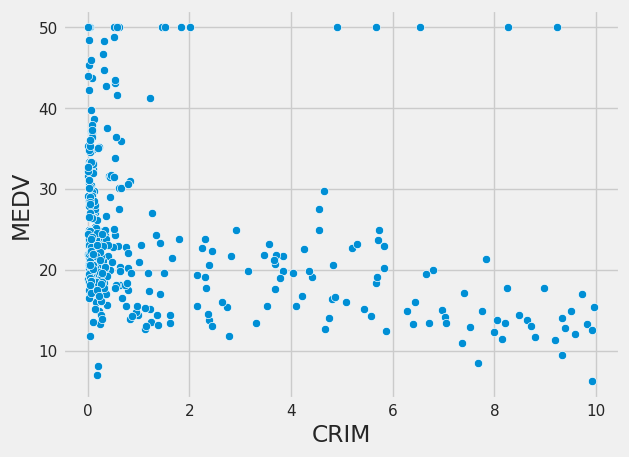

In [13]:
sns.scatterplot(x = 'CRIM', y = 'MEDV', data = new_data)

<Axes: xlabel='RM', ylabel='MEDV'>

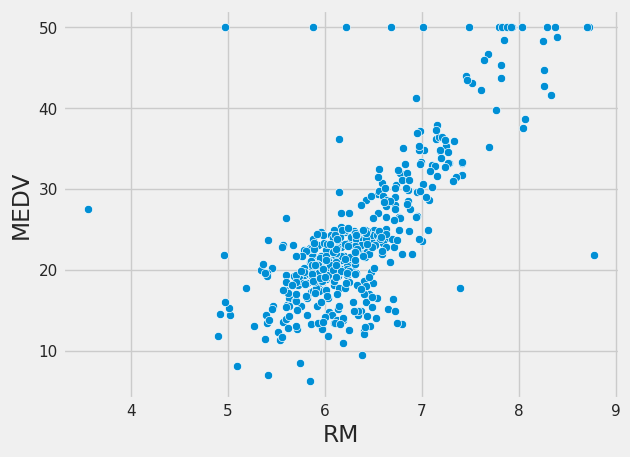

In [14]:
sns.scatterplot(x = 'RM', y = 'MEDV', data = new_data)

Lets check for Nitric Oxide concentration, if owners live in places where there is a high amount of Nitric Oxide concentration.

<Axes: xlabel='NOX', ylabel='MEDV'>

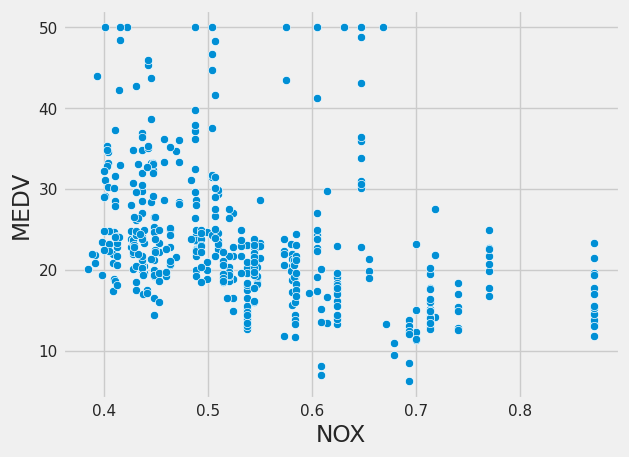

In [15]:
sns.scatterplot(x = 'NOX', y = 'MEDV', data = new_data)

From our plot we can see that where there are less concentration of Nitric Oxide More people dwell in such places 

<Axes: >

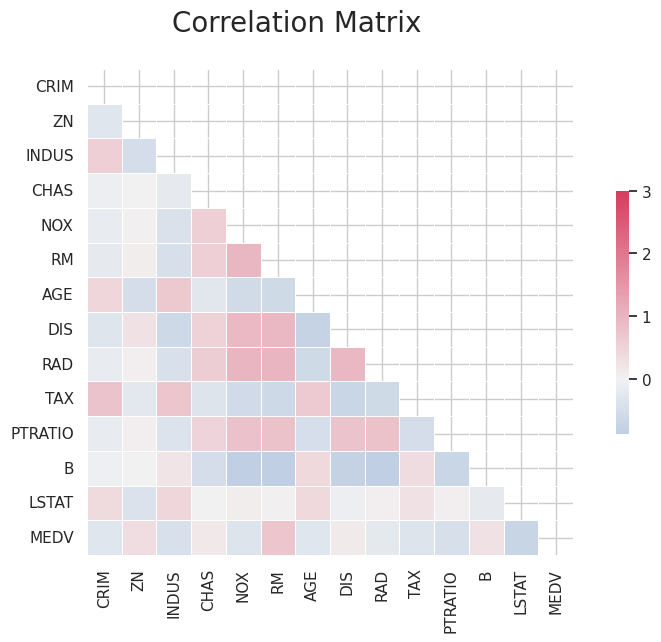

In [16]:
sns.set(style = 'whitegrid', font_scale = 1)

#compute the correlation matrix
corr = new_data.corr()

#generate the mask for the upper triangle
mask = np.zeros_like(corr, dtype = int)
mask[np.triu_indices_from(mask)] = True

#setup the matplotlib figure
f, ax = plt.subplots(figsize = (10, 6))
f.suptitle("Correlation Matrix" , fontsize = 20 )

#generate a custom diverging colormap
cmap = sns.diverging_palette(250, 4, n=9, as_cmap= True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 3, center = 0,
           square = True, linewidths = .5, cbar_kws= {'shrink': .5})

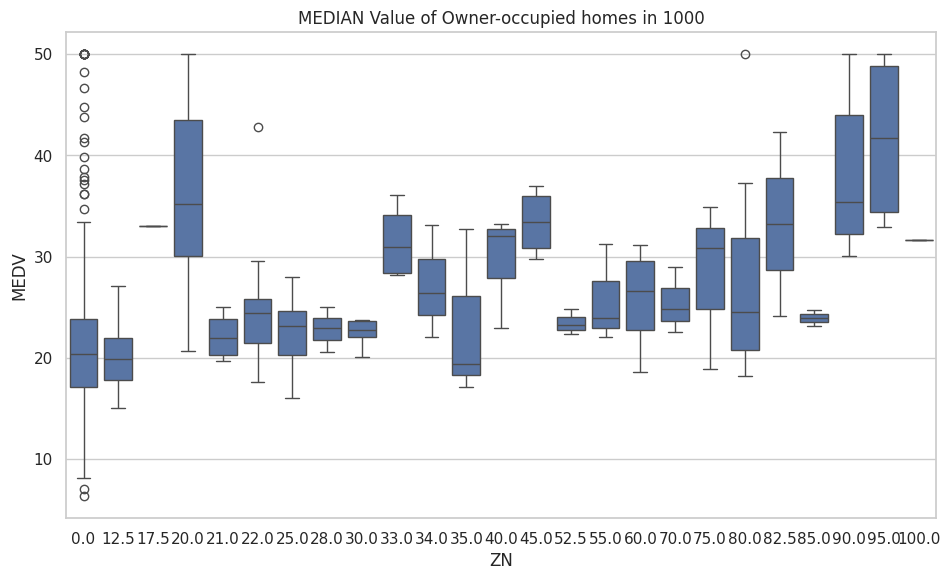

In [17]:
ng = new_data[new_data.MEDV < 1000]
plt.figure(figsize=(10,6))
sns.boxplot(y="MEDV",x ='ZN', data = ng)
plt.title("MEDIAN Value of Owner-occupied homes in 1000")
plt.show()

### Preparing my Model 

In [18]:
new_data = new_data.dropna(subset=['MEDV'])

In [19]:
# Marking my dependant and independent variables 
#Here y == MEDV = Target variable
X = new_data.drop(['MEDV'], axis= 1)
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


In [20]:
#Now we make y our target variable
y = new_data['MEDV']

#inspecting
y.head(3)


0    21.6
1    34.7
2    33.4
Name: MEDV, dtype: float64

### Splitting my Data Into Training and Testing Dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Lets divide our dataset into the trainig and testing set
# My testing data will be 25%
#And my training data will be 75%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [23]:
#lets visualize the number of training dataset:
len(X_train)

338

In [24]:
#Lets visualize the number of testing data set
len(X_test)

113

### Preparing to traing the model

In [25]:
from sklearn import linear_model

In [26]:
lr_model = linear_model.LinearRegression(n_jobs= 1)

### Now Training my Model

In [27]:
np.isnan(y.any())

np.False_

In [28]:
print("Any NaNs in y:", y.isna().sum())
print("Shapes:", X.shape, y.shape)

Any NaNs in y: 0
Shapes: (451, 13) (451,)


our dataset is in shape, Now we train our model

In [29]:
from sklearn import linear_model

In [30]:


lr_model = linear_model.LinearRegression(n_jobs= -1)
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


Now Lets check for actual vs predicted accuracy

In [31]:
predicts = lr_model.predict(X_test)
error_boston = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_boston.head()

,Actual Values,Predicted Values
0,29.0,32.470013
1,34.9,34.288935
2,19.5,19.997901
3,14.1,19.081840
4,17.0,23.484493


To get the RMSE Value

In [32]:
y_testpred = lr_model.predict(X_test)

In [33]:
from math import sqrt

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
rms = sqrt(mean_squared_error(y_test, y_testpred))

In [36]:
print('The RMSE Value is:', rms)

The RMSE Value is: 4.407342485633837
